# Credit Risk Modeling

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [29]:
raw_data = pd.read_csv('cr_loan2.xls')
cr_loan = raw_data.copy()

### Basic Data Exploration

Check the structure of the data

In [30]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Check the first 5 rows

In [31]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Loan_status feature: 1 is default and 0 is non-default

We create a cross table of the loan intent and loan status

In [32]:
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


### Finding Outliers

Finding outliers with cross tables

In [33]:
pd.crosstab(cr_loan['loan_status'], cr_loan['person_home_ownership'], cr_loan['person_emp_length'], aggfunc = 'max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


Person_emp_length where values greater than 60 were far above the norm.

We can also look at the person age column to see if there are outliers. In order to do this, we are going to create a scatter plot with the person age and the loan amount.

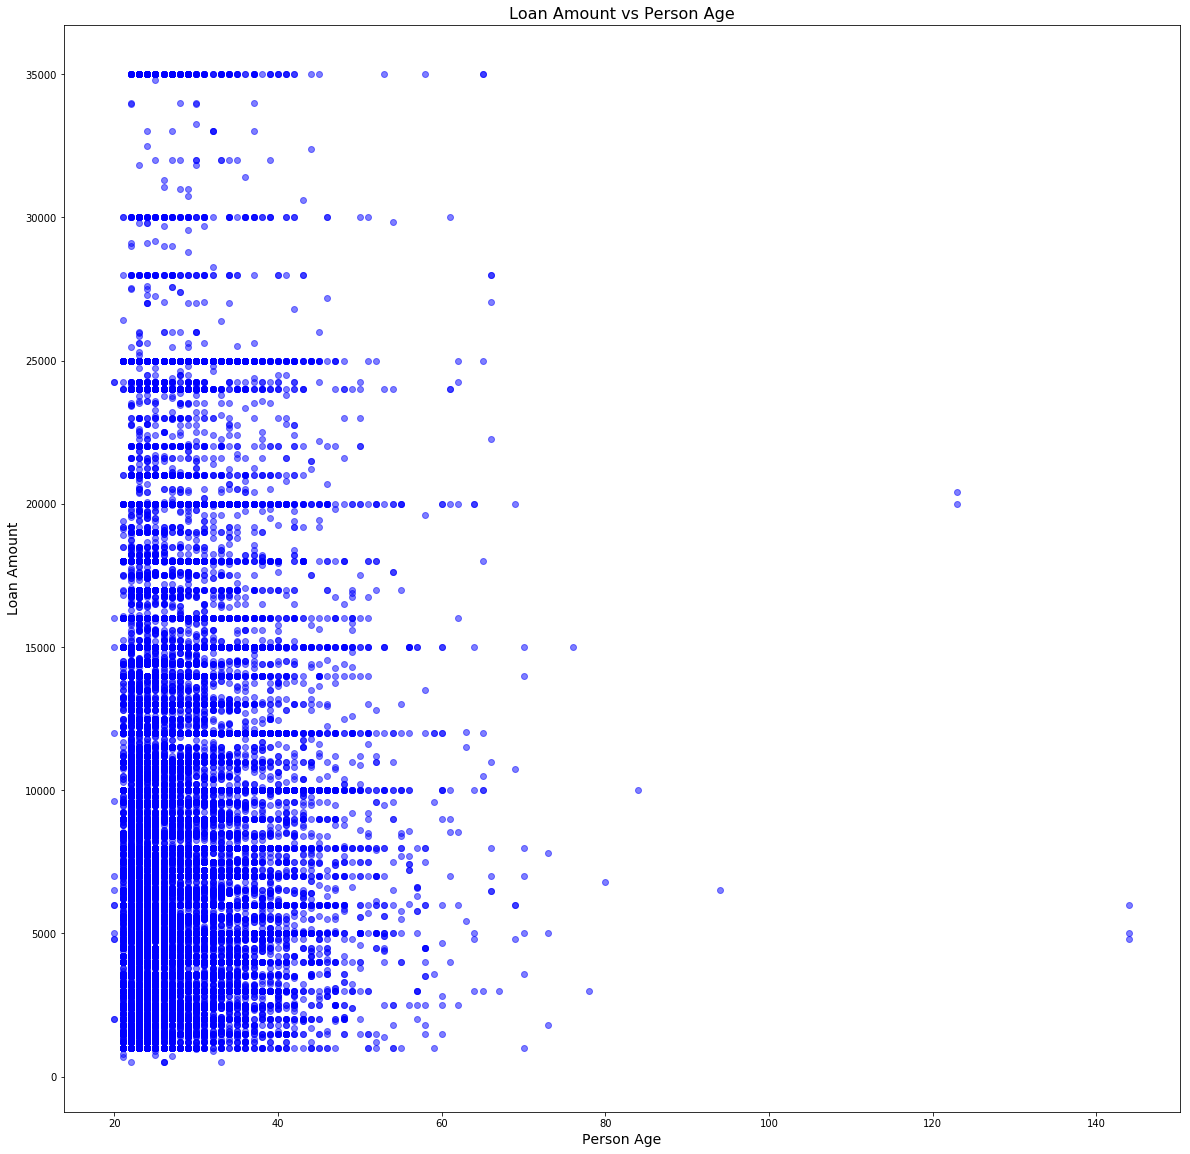

In [34]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue',alpha = 0.5)
plt.title('Loan Amount vs Person Age', fontsize = '16')
plt.ylabel('Loan Amount', fontsize = '14')
plt.xlabel('Person Age', fontsize='14')
plt.show()

### Replace Missing Data

It is critical that we do not have any missiong data in the loan status column.

We want to detect the columns with missing data

In [35]:
cr_loan.columns[cr_loan.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

We print the top five rows with nulls for employment length

In [36]:
cr_loan[cr_loan['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


We replace the null values with the median value for all employment lengths

In [37]:
cr_loan['person_emp_length'].fillna(cr_loan['person_emp_length'].median(), inplace = True)

We now reate a histogram of employment length

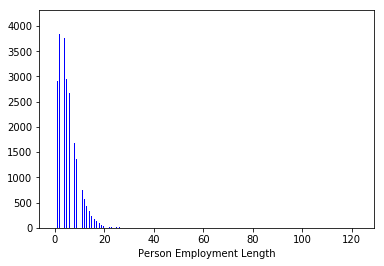

In [38]:
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

Remove Missing Data

In [39]:
cr_loan['loan_int_rate'].isnull().sum()

3116

We store the array in indicies

In [41]:
cr_loan.dropna(subset=['loan_int_rate'], inplace = True)

In [42]:
cr_loan['loan_int_rate'].isnull().sum()

0

Count the number of records for each unique value

In [43]:
cr_loan['person_home_ownership'].value_counts()

RENT        14893
MORTGAGE    12122
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64